## Lab 1 Exploring datasets

In this lab, you will be working with exploring and preparing a dataset for data mining tasks. Save your implementations with the name 'lab1_yourname.ipynb' and submit by the due date.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",100)
import warnings
warnings.simplefilter('ignore')

## Data overview

This dataset contains information on reviews of arabica and robusta coffee beans from the Coffee Quality Institute's trained reviewers. The features in the datatset are as follows:

## Quality Measures
- Aroma
- Flavor
- Aftertaste
- Acidity
- Body
- Balance
- Uniformity
- Cup Cleanliness
- Sweetness
- Moisture
- Defects

## Bean Metadata
- Processing Method
- Color
- Species (arabica / robusta)

## Farm Metadata
- Owner
- Country of Origin
- Farm Name
- Lot Number
- Mill
- Company
- Altitude
- Region


### Load data

In [2]:
filepath = './coffee_stats.csv'
data = pd.read_csv(filepath, index_col=False)
data.columns = data.columns.str.lower()
data = data.drop(columns=data.columns[0])

In [3]:
# a view of the dataset
data.head()

,species,owner,country.of.origin,farm.name,lot.number,mill,ico.number,company,altitude,region,producer,number.of.bags,bag.weight,in.country.partner,harvest.year,grading.date,owner.1,variety,processing.method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,total.cup.points,moisture,category.one.defects,quakers,color,category.two.defects,expiration,certification.body,certification.address,certification.contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
data.describe()

,number.of.bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,total.cup.points,moisture,category.one.defects,quakers,category.two.defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [5]:
#description of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   species                1339 non-null   object 
 1   owner                  1332 non-null   object 
 2   country.of.origin      1338 non-null   object 
 3   farm.name              980 non-null    object 
 4   lot.number             276 non-null    object 
 5   mill                   1021 non-null   object 
 6   ico.number             1182 non-null   object 
 7   company                1130 non-null   object 
 8   altitude               1113 non-null   object 
 9   region                 1280 non-null   object 
 10  producer               1107 non-null   object 
 11  number.of.bags         1339 non-null   int64  
 12  bag.weight             1339 non-null   object 
 13  in.country.partner     1339 non-null   object 
 14  harvest.year           1292 non-null   object 
 15  grad


<div class='alert alert-block alert-warning' style='font-size:150%'>
    
### Data Cleaning

</div>

**Data Cleaning** involves handling missing data, removing duplicates, and removing inconsistent values.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1

### 1a: Real data usually contains missing values. First, identify whether the dataset contains an missing values.
### 1b: Fill the missing values in the categorical columns with 'Unknown'
### 1c: Second, apply any of the techniques in the link to address the missing values in the numerical colums in the   dataset(https://pandas.pydata.org/docs/user_guide/missing_data.html).
    
### 1d: Find out if there are any duplicates in the dataset and remove them

</div>

In [6]:
# please implement task 1a here
#nan_data = (data=='NaN')
print(f"Number of null values are {data.isna().sum().sum()}")


Number of null values are 3990


In [7]:
# please implement task 1b here
categorical = ['species', 'owner', 'country.of.origin', 'farm.name',
       'mill', 'ico.number', 'company', 'region', 'producer',
        'in.country.partner', 'owner.1', 'variety', 'processing.method', 'color',
       'certification.body', 'certification.address', 'certification.contact',
       'unit_of_measurement', 'lot.number', 'altitude', 'harvest.year', 'bag.weight', 'grading.date', 'expiration' ]
data[categorical] = data[categorical].fillna('Unknown')
data.head

<bound method NDFrame.head of       species                     owner country.of.origin  \
0     Arabica                 metad plc          Ethiopia   
1     Arabica                 metad plc          Ethiopia   
2     Arabica  grounds for health admin         Guatemala   
3     Arabica       yidnekachew dabessa          Ethiopia   
4     Arabica                 metad plc          Ethiopia   
...       ...                       ...               ...   
1334  Robusta               luis robles           Ecuador   
1335  Robusta               luis robles           Ecuador   
1336  Robusta               james moore     United States   
1337  Robusta             cafe politico             India   
1338  Robusta             cafe politico           Vietnam   

                                     farm.name lot.number            mill  \
0                                    metad plc    Unknown       metad plc   
1                                    metad plc    Unknown       metad plc   
2     

In [8]:
# please implement task 1c here
data = data.fillna(data.mean())
data.head

<bound method NDFrame.head of       species                     owner country.of.origin  \
0     Arabica                 metad plc          Ethiopia   
1     Arabica                 metad plc          Ethiopia   
2     Arabica  grounds for health admin         Guatemala   
3     Arabica       yidnekachew dabessa          Ethiopia   
4     Arabica                 metad plc          Ethiopia   
...       ...                       ...               ...   
1334  Robusta               luis robles           Ecuador   
1335  Robusta               luis robles           Ecuador   
1336  Robusta               james moore     United States   
1337  Robusta             cafe politico             India   
1338  Robusta             cafe politico           Vietnam   

                                     farm.name lot.number            mill  \
0                                    metad plc    Unknown       metad plc   
1                                    metad plc    Unknown       metad plc   
2     

In [9]:
# please implement task 1d here
print(f"Number of duplicate values are {data.duplicated().sum().sum()}")
data = data.drop_duplicates()

Number of duplicate values are 0


<div class='alert alert-block alert-warning' style='font-size:150%'>

### Encoding categorical features

</div>

**Encoding categorical features** transforms categorical features to numerical values. The two main methods are one-hot encoding and label encoding.

**One-hot encoding** is mostly applied to categorical data that does not follow any order. Here, the values are mapped to binary values 0 or 1.

**Label Encoding** assigns a numerical value to each categorical value. It is usually suitable for data that follows an order or ranking (ordinal data).



<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2

### Find out and implement a method of encoding categorical columns, like one-hot encoding  or label encoding. Which one works better in this case?

</div>

In [10]:
# please implement task 2 here
categorical = ['species', 'owner', 'country.of.origin', 'farm.name',
       'mill', 'ico.number', 'company', 'region', 'producer',
        'in.country.partner', 'owner.1', 'variety', 'processing.method', 'color',
       'certification.body', 'certification.address', 'certification.contact',
       'unit_of_measurement', 'lot.number']
dummies = pd.get_dummies(data, columns = categorical)
dummies.head()
#One-hot encoding is probably the better choice since we do not have a lot of ordinal data

,altitude,number.of.bags,bag.weight,harvest.year,grading.date,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,total.cup.points,moisture,category.one.defects,quakers,category.two.defects,expiration,altitude_low_meters,altitude_high_meters,altitude_mean_meters,species_Arabica,species_Robusta,owner_Unknown,owner_acacia hills ltd,owner_adam ciruli ye,owner_adam kline,owner_adriana torres rico quevedo,owner_afca,owner_alejandro garcia palacios,owner_alexandra katona-carroll,owner_alfredo bojalil,owner_almacafe,owner_alvaro quiros perez,owner_amanda powers,owner_amkeni gourmet coffee group,owner_ana gonzales,owner_andrea bernal,owner_andreas kussmaul,owner_andres martinez leon,owner_andrew bowman,owner_andrew hetzel,owner_andry simarmata,owner_angel oscar medina rodriguez,owner_ankole coffee producers coop,owner_armando luis pohlenz martinez,owner_artemio zapata tejeda,...,lot.number_INT-2015,lot.number_K25159,lot.number_K7 Chamarel 2015,lot.number_KLEM-C04,lot.number_KLEM-C08,lot.number_LP-C211-180,lot.number_LP-C211-181,lot.number_LP-C211-182,lot.number_Lavado 1,lot.number_Lavado 3,lot.number_Lot # 331,lot.number_Lot A 20170519,lot.number_MANDHELING BRASTAGI,lot.number_MCCFWXA15/16,lot.number_MCCRNX115/16,lot.number_MCRKPBG 15/16,lot.number_MCTFHMG15/16,lot.number_Mezcla Veracruz 01,lot.number_Oriental Paris Civet Coffee,lot.number_Oriental Paris Natural Coffee,lot.number_RC AB,lot.number_RKR,lot.number_S015.367,lot.number_S3/01/2017,lot.number_SC 9634,lot.number_SRAN-Gayo,lot.number_Tarrazu,lot.number_Tsoustructive 2015 Caturra,lot.number_Tsoustructive 2015 Sumatra Typica,lot.number_Tsoustructive 2015 Typica,lot.number_Unknown,lot.number_YNC-06114,lot.number_YNC-16014,lot.number_YNC-16017,lot.number_YNC-16018,lot.number_YNC-16028,lot.number_YNC-16029,lot.number_YNC-16047,lot.number_YNC-16053,lot.number_YNC-16056,lot.number_YNC-16057,lot.number_YNC-16063,lot.number_YNC-16115,lot.number_Zona: los imposibles,lot.number_cosecha 2015-2016,lot.number_none,lot.number_s16292,lot.number_sc 9693,lot.number_sran toraja,lot.number_sran-ijen
0,1950-2200,300,60 kg,2014,"April 4th, 2015",8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,0,"April 3rd, 2016",1950.0,2200.0,2075.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1950-2200,300,60 kg,2014,"April 4th, 2015",8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,1,"April 3rd, 2016",1950.0,2200.0,2075.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1600 - 1800 m,5,1,Unknown,"May 31st, 2010",8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,0,"May 31st, 2011",1600.0,1800.0,1700.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1800-2200,320,60 kg,2014,"March 26th, 2015",8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,2,"March 25th, 2016",1800.0,2200.0,2000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1950-2200,300,60 kg,2014,"April 4th, 2015",8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,2,"April 3rd, 2016",1950.0,2200.0,2075.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<div class='alert alert-block alert-warning' style='font-size:150%'>

### Feature Scaling  


</div>

**Feature Scaling** involves scaling the values in a dataset to a fixed range. It is usually applied to continuous values to ensure that the values are on a comparable scale. 

The most common technique to scale values is the min-max method. Here, we subtract the minimum value from each value in a column(or dataset) and divide the result by the difference between the maximum and minimum values.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 3
    
### Implement min-max standardization on the continuous values in the dataset.


</div>

In [11]:
# please implement task 3 here
continous = data.select_dtypes(include=['float64', 'int64']).columns
print(continous)
dummies_only = dummies.drop(continous, axis=1)
continous = data[continous]
scaled = (continous-continous.min())/(continous.max() - continous.min())
scaled = pd.concat((scaled, dummies_only), 1)
scaled.head()

Index(['number.of.bags', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean.cup', 'sweetness', 'cupper.points',
       'total.cup.points', 'moisture', 'category.one.defects', 'quakers',
       'category.two.defects', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')


,number.of.bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,total.cup.points,moisture,category.one.defects,quakers,category.two.defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters,altitude,bag.weight,harvest.year,grading.date,expiration,species_Arabica,species_Robusta,owner_Unknown,owner_acacia hills ltd,owner_adam ciruli ye,owner_adam kline,owner_adriana torres rico quevedo,owner_afca,owner_alejandro garcia palacios,owner_alexandra katona-carroll,owner_alfredo bojalil,owner_almacafe,owner_alvaro quiros perez,owner_amanda powers,owner_amkeni gourmet coffee group,owner_ana gonzales,owner_andrea bernal,owner_andreas kussmaul,owner_andres martinez leon,owner_andrew bowman,owner_andrew hetzel,owner_andry simarmata,owner_angel oscar medina rodriguez,owner_ankole coffee producers coop,owner_armando luis pohlenz martinez,owner_artemio zapata tejeda,...,lot.number_INT-2015,lot.number_K25159,lot.number_K7 Chamarel 2015,lot.number_KLEM-C04,lot.number_KLEM-C08,lot.number_LP-C211-180,lot.number_LP-C211-181,lot.number_LP-C211-182,lot.number_Lavado 1,lot.number_Lavado 3,lot.number_Lot # 331,lot.number_Lot A 20170519,lot.number_MANDHELING BRASTAGI,lot.number_MCCFWXA15/16,lot.number_MCCRNX115/16,lot.number_MCRKPBG 15/16,lot.number_MCTFHMG15/16,lot.number_Mezcla Veracruz 01,lot.number_Oriental Paris Civet Coffee,lot.number_Oriental Paris Natural Coffee,lot.number_RC AB,lot.number_RKR,lot.number_S015.367,lot.number_S3/01/2017,lot.number_SC 9634,lot.number_SRAN-Gayo,lot.number_Tarrazu,lot.number_Tsoustructive 2015 Caturra,lot.number_Tsoustructive 2015 Sumatra Typica,lot.number_Tsoustructive 2015 Typica,lot.number_Unknown,lot.number_YNC-06114,lot.number_YNC-16014,lot.number_YNC-16017,lot.number_YNC-16018,lot.number_YNC-16028,lot.number_YNC-16029,lot.number_YNC-16047,lot.number_YNC-16053,lot.number_YNC-16056,lot.number_YNC-16057,lot.number_YNC-16063,lot.number_YNC-16115,lot.number_Zona: los imposibles,lot.number_cosecha 2015-2016,lot.number_none,lot.number_s16292,lot.number_sc 9693,lot.number_sran toraja,lot.number_sran-ijen
0,0.282486,0.990857,1.000000,1.000000,1.000000,0.990676,0.962286,1.0,1.0,1.0,0.875,1.000000,0.428571,0.0,0.0,0.000000,0.010249,0.011564,0.010906,1950-2200,60 kg,2014,"April 4th, 2015","April 3rd, 2016",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.282486,1.000000,0.981880,0.980392,0.980571,0.981352,0.962286,1.0,1.0,1.0,0.858,0.992714,0.428571,0.0,0.0,0.018182,0.010249,0.011564,0.010906,1950-2200,60 kg,2014,"April 4th, 2015","April 3rd, 2016",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.004708,0.962286,0.962627,0.971165,0.962286,0.970862,0.962286,1.0,1.0,1.0,0.925,0.990837,0.000000,0.0,0.0,0.000000,0.008409,0.009460,0.008934,1600 - 1800 m,1,Unknown,"May 31st, 2010","May 31st, 2011",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.301318,0.933714,0.971687,0.971165,0.962286,0.990676,0.942857,1.0,1.0,1.0,0.867,0.982557,0.392857,0.0,0.0,0.036364,0.009460,0.011564,0.010512,1800-2200,60 kg,2014,"March 26th, 2015","March 25th, 2016",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.282486,0.942857,0.962627,0.951557,0.971429,0.981352,0.952000,1.0,1.0,1.0,0.858,0.980680,0.428571,0.0,0.0,0.036364,0.010249,0.011564,0.010906,1950-2200,60 kg,2014,"April 4th, 2015","April 3rd, 2016",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<div class='alert alert-block alert-warning' style='font-size:150%'>

### Classs Imbalance


</div>

Class imbalance refers to a situation where we have unequal distributions of classes in a dataset. For example, in our dataset, we can see that the number of data points belonging to Arabica coffeee beans is significantly higher than Robusta.

Class imbalance is a common problem in real-world data that often leads to biased analysis.Techniques that can be used to address imbalance include Undersampling(reduce the number of data points from the majority class) and Oversampling (increase the number of samples from the minority class).

<img src="images/imbalance.png" alt="Alternative text" />

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 4
    
### Find out what is the best approach to address class imbalance in the dataset and implement it. Give reasons for your answer.


</div>

In [12]:
# please implement task 4 here
#I will use oversampling in order to not loose data and keep the dataset a good size
print(data.species.value_counts())
arabica_count, robusta_count = data.species.value_counts()
arabica = scaled[scaled['species_Arabica'] == 1]
robusta = scaled[scaled['species_Robusta'] == 1]
robusta_over = robusta.sample(arabica_count, replace=True)
oversampled = pd.concat((arabica, robusta_over), axis =0)
print(oversampled.species_Arabica.value_counts())

Arabica    1311
Robusta      28
Name: species, dtype: int64
1    1311
0    1311
Name: species_Arabica, dtype: int64


<div class='alert alert-block alert-warning' style='font-size:150%'>

### Feature Selection


</div>

**Feature Selection** involves selecting important features from a dataset and removing irrelevant or redundant features. Feature selection methods include filter based methods, wrapper methods and embedded methods.

**Filter-based methods** : filters features by some ordering or ranking techniques. e.g Chi-square test, Pearson's correlation

**Wrapper based methods** : feature selection is framed as a search problem, where different features are combined and evaluated. e.g. Forward Selection, Backward Elimination, Step-wise Selection

**Embedded methods** : combine wrapper based and filter based techniques to select features. e.g Lasso, Tree-based

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 5
    
### Find out and implement any feature selection technique on the dataset


</div>

In [13]:
# please implement task 5 here
#Filter based feature selection
correlated = oversampled.corr(method='pearson')
print(correlated)

                        number.of.bags     aroma    flavor  aftertaste  \
number.of.bags                1.000000  0.110452  0.247332    0.276930   
aroma                         0.110452  1.000000  0.782169    0.759314   
flavor                        0.247332  0.782169  1.000000    0.908021   
aftertaste                    0.276930  0.759314  0.908021    1.000000   
acidity                       0.229549  0.679299  0.814349    0.783659   
...                                ...       ...       ...         ...   
lot.number_none               0.013336 -0.002997  0.000515    0.001260   
lot.number_s16292             0.016952  0.011118 -0.003852   -0.002821   
lot.number_sc 9693            0.006103  0.006602  0.000515    0.001260   
lot.number_sran toraja       -0.022538 -0.007513  0.000515   -0.002821   
lot.number_sran-ijen         -0.022538 -0.040260 -0.040425   -0.028329   

                         acidity      body   balance  uniformity  clean.cup  \
number.of.bags          0.229549

<div class='alert alert-block alert-warning' style='font-size:150%'>

### Data Visualization


</div>

**Data Visualization** helps us to explore trends in the data, find correlations, or detect outliers. In the example below, we visualize the distribution of values for the feature:aroma. From the visualization, we see that most of the values from the feature:aroma fall between the values 6 and 9. This information can be used to inform our data mining tasks later on.


<img src="images/aroma.png" alt="Alternative text" />

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 6

### 6a: Implement two box plots on the features 'moisture' and 'sweetness' to identify any outliers. What do you see in the plot? (Write your answers below)
    
### 6b: Implement a scatter plot to visualize the moisture and sweetness of the species (Arabica and Robusta). What do you see?

</div>

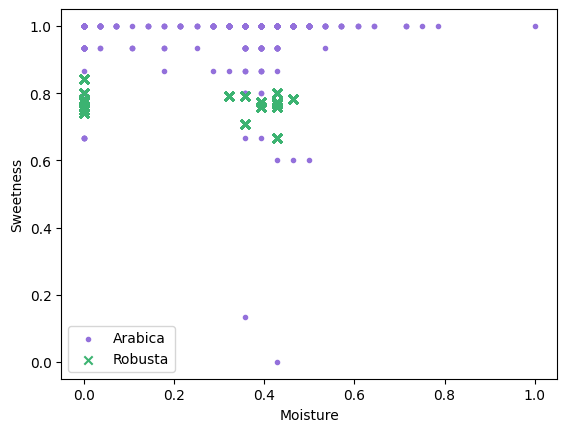

In [31]:
# please implement task 6b here
fig, ax = plt.subplots()
ax.scatter(oversampled.moisture[oversampled.species_Arabica == 1], oversampled.sweetness[oversampled.species_Arabica == 1],
           c='mediumpurple', marker='.', label='Arabica')
ax.scatter(oversampled.moisture[oversampled.species_Robusta == 1], oversampled.sweetness[oversampled.species_Robusta == 1],
           c='mediumseagreen', marker='x', label='Robusta')
ax.legend()
ax.set_xlabel('Moisture')
ax.set_ylabel('Sweetness')
plt.show()

<AxesSubplot:>

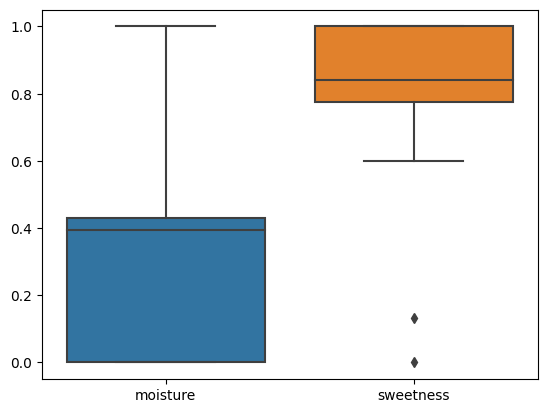

In [14]:
# please implement task 6a here
sns.boxplot(data=oversampled[['moisture', 'sweetness']])
